In [359]:
import pandas as pd

In [360]:
df = pd.read_csv('weight-height.csv')
df

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801
...,...,...,...
9995,Female,66.172652,136.777454
9996,Female,67.067155,170.867906
9997,Female,63.867992,128.475319
9998,Female,69.034243,163.852461


In [361]:
df.drop('Weight', axis='columns', inplace=True)
df

,Gender,Height
0,Male,73.847017
1,Male,68.781904
2,Male,74.110105
3,Male,71.730978
4,Male,69.881796
...,...,...
9995,Female,66.172652
9996,Female,67.067155
9997,Female,63.867992
9998,Female,69.034243


In [362]:
q1=df['Height'].quantile(0.25)
q3=df['Height'].quantile(0.75)
q1, q3

(63.505620481218955, 69.1742617268347)

In [363]:
IQR = q3-q1
IQR


5.668641245615746

In [364]:
lower_limit = q1 - 1.5*IQR
upper_limit = q3 + 1.5*IQR
lower_limit, upper_limit

(55.00265861279534, 77.67722359525831)

In [365]:
df_no_outlier=df[(df['Height']>lower_limit) & (df['Height']<upper_limit)]
df_no_outlier


,Gender,Height
0,Male,73.847017
1,Male,68.781904
2,Male,74.110105
3,Male,71.730978
4,Male,69.881796
...,...,...
9995,Female,66.172652
9996,Female,67.067155
9997,Female,63.867992
9998,Female,69.034243


In [366]:
# Exercise for heigth and weight 

In [367]:
import pandas as pd

In [368]:
df = pd.read_csv('weight-height.csv')
df

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801
...,...,...,...
9995,Female,66.172652,136.777454
9996,Female,67.067155,170.867906
9997,Female,63.867992,128.475319
9998,Female,69.034243,163.852461


In [369]:
from matplotlib import pyplot as plt

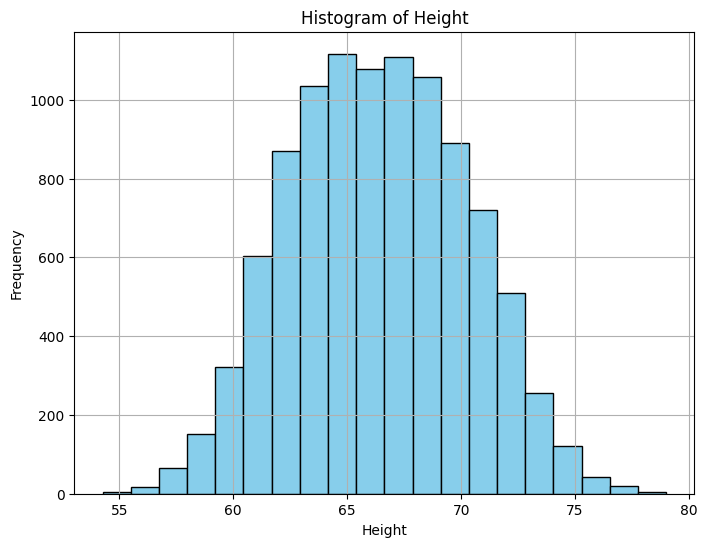

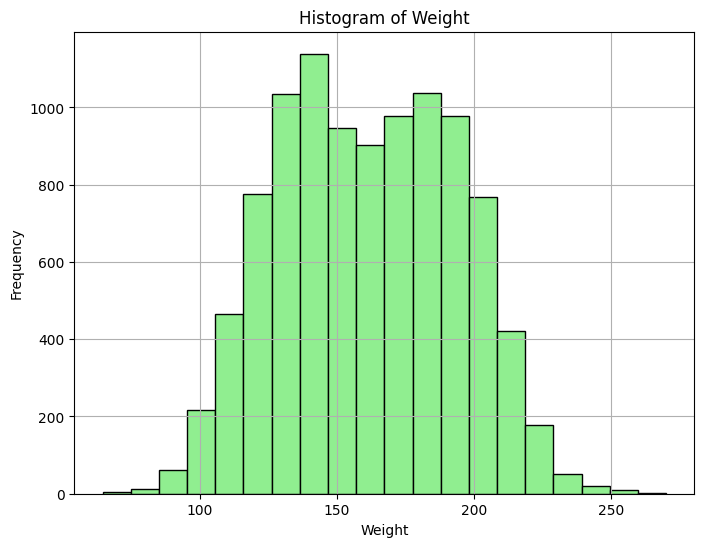

In [370]:
height = df['Height']
weight = df['Weight']

# Plot histogram for Height
plt.figure(figsize=(8, 6))
plt.hist(height, bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Height')
plt.ylabel('Frequency')
plt.title('Histogram of Height')
plt.grid(True)
plt.show()

# Plot histogram for Weight
plt.figure(figsize=(8, 6))
plt.hist(weight, bins=20, color='lightgreen', edgecolor='black')
plt.xlabel('Weight')
plt.ylabel('Frequency')
plt.title('Histogram of Weight')
plt.grid(True)
plt.show()


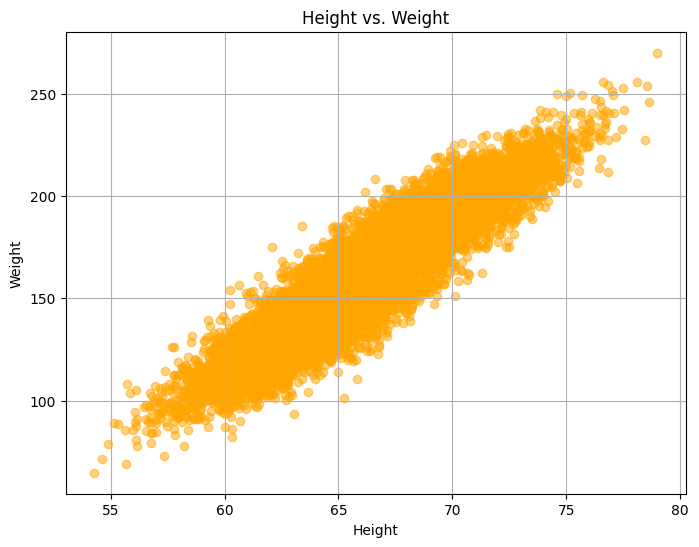

In [371]:
import matplotlib.pyplot as plt

# Assuming 'Height' and 'Weight' are columns in your DataFrame
height = df['Height']
weight = df['Weight']

# Plot scatter plot of Height against Weight
plt.figure(figsize=(8, 6))
plt.scatter(height, weight, color='orange', alpha=0.5)
plt.xlabel('Height')
plt.ylabel('Weight')
plt.title('Height vs. Weight')
plt.grid(True)
plt.show()


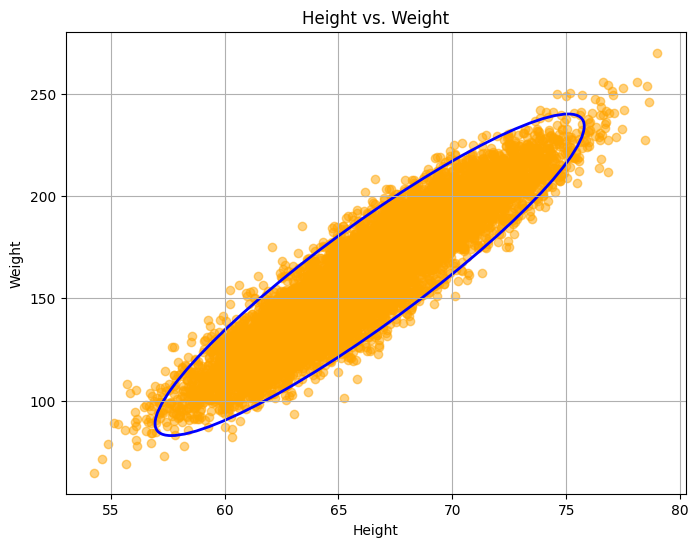

In [372]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse
from scipy.stats import multivariate_normal

# Assuming 'Height' and 'Weight' are columns in your DataFrame
height = df['Height']
weight = df['Weight']

# Compute mean values for height and weight
mean_height = np.mean(height)
mean_weight = np.mean(weight)

# Compute covariance matrix
cov_matrix = np.cov(height, weight)

# Set confidence level (e.g., 95%)
confidence_level = 0.95

# Compute eigenvalues and eigenvectors of covariance matrix
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

# Compute angle of rotation for ellipse
theta = np.arctan2(eigenvectors[1, 0], eigenvectors[0, 0])

# Compute standard deviation along major and minor axes
major_std = np.sqrt(eigenvalues[0] * -2 * np.log(1 - confidence_level))
minor_std = np.sqrt(eigenvalues[1] * -2 * np.log(1 - confidence_level))

# Plot scatter plot of Height against Weight
plt.figure(figsize=(8, 6))
plt.scatter(height, weight, color='orange', alpha=0.5)
plt.xlabel('Height')
plt.ylabel('Weight')
plt.title('Height vs. Weight')

# Plot ellipse representing covariance
ellipse = Ellipse((mean_height, mean_weight), width=major_std * 2, height=minor_std * 2,
                  angle=np.degrees(theta), edgecolor='blue', fc='None', lw=2)
plt.gca().add_patch(ellipse)

plt.grid(True)
plt.show()


In [373]:
# outliers for Height

In [374]:
q1 = df['Height'].quantile(0.25)
q3 = df['Height'].quantile(0.75)
IQR = q3-q1
q1,q3,IQR

(63.505620481218955, 69.1742617268347, 5.668641245615746)

In [375]:
# Remove the Outliers

In [376]:
lower_limit = q1- 1.5*IQR
upper_limit = q3+ 1.5*IQR
lower_limit, upper_limit

(55.00265861279534, 77.67722359525831)

In [377]:
df_filtered = df[(df['Height'] >= lower_limit) & (df['Height'] <= upper_limit)]
df_filtered

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801
...,...,...,...
9995,Female,66.172652,136.777454
9996,Female,67.067155,170.867906
9997,Female,63.867992,128.475319
9998,Female,69.034243,163.852461


In [378]:
# outliers for Weigth

In [379]:
q1 = df_filtered['Weight'].quantile(0.25)
q3 = df_filtered['Weight'].quantile(0.75)
IQR = q3-q1
q1,q3,IQR

(135.82126866320925, 187.1246464833845, 51.30337782017526)

In [380]:
# Remove the Outliers

In [381]:
lower_limit = q1- 1.5*IQR
upper_limit = q3+ 1.5*IQR
lower_limit, upper_limit

(58.86620193294637, 264.0797132136474)

In [382]:
df_filtered_filtered =df_filtered[(df_filtered['Weight'] >= lower_limit) & (df_filtered['Weight'] <= upper_limit)]
df_filtered_filtered

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801
...,...,...,...
9995,Female,66.172652,136.777454
9996,Female,67.067155,170.867906
9997,Female,63.867992,128.475319
9998,Female,69.034243,163.852461


In [383]:
df_filtered.to_csv('df_filtered_outliers.csv', index=False)